In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log as ln
from scipy.stats import kstest,boxcox
from scipy import stats
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [11]:
df = pd.read_csv("assurance.csv")
df=df.drop_duplicates()

In [12]:
df['charges'].describe()
# df['std_charges']= df['charges'].apply(lambda x : (x-13270.422265)/12110.011237)


count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [13]:
# df['boxcox_charges']= df['charges'].apply(lambda x : boxcox(x)[0])

In [14]:
# df['std_charges'].mean()

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Analyse univariée de chaque variable

In [16]:
df_continue= df[['age','bmi','charges']]
df_continue

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


<Figure size 1800x700 with 0 Axes>

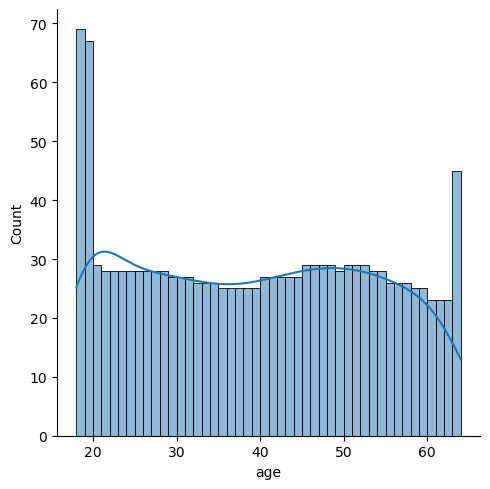

In [17]:
plt.figure(figsize=[18,7])
sns.displot(data=df,x="age", kde=True, bins=46 )
plt.show()

In [18]:
df['cub_age']= df['age'].apply(lambda x : x**(1/3))
df['cub_age']

0       2.668402
1       2.620741
2       3.036589
3       3.207534
4       3.174802
          ...   
1333    3.684031
1334    2.620741
1335    2.620741
1336    2.758924
1337    3.936497
Name: cub_age, Length: 1337, dtype: float64

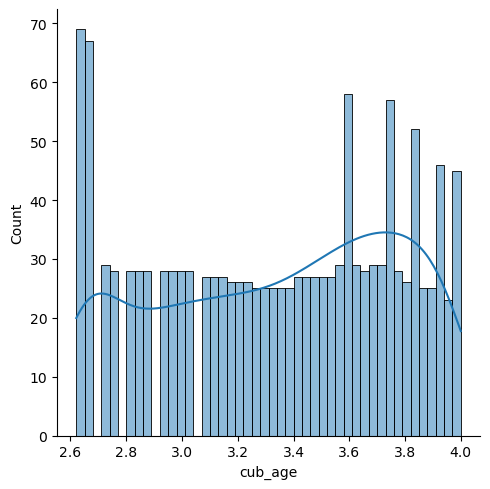

In [19]:
sns.displot(data=df,x="cub_age", kde=True, bins=46 )

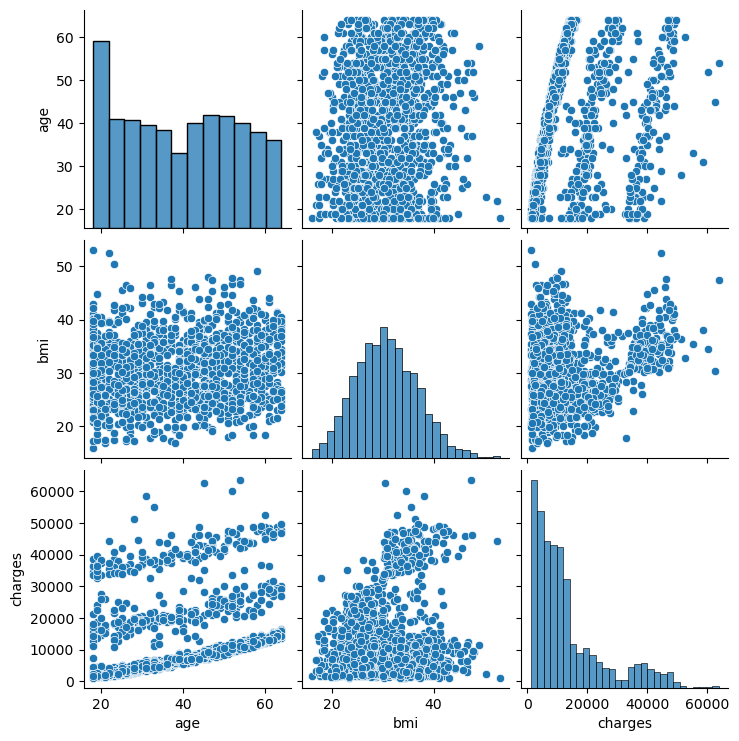

In [20]:
sns.pairplot(df_continue)

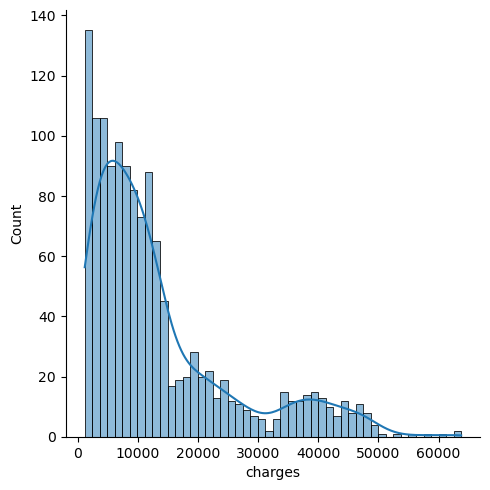

In [21]:
sns.displot(data=df,x="charges", kde=True, bins=50 )

In [22]:
df['ln_charges']= df['charges'].apply(lambda x : ln(x))

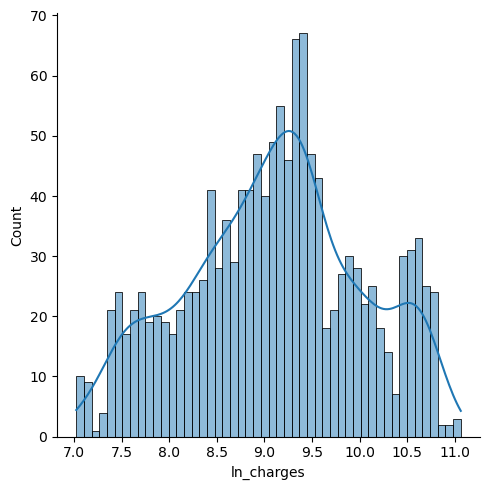

In [23]:
sns.displot(data=df,x="ln_charges", kde=True, bins=50 )

In [24]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

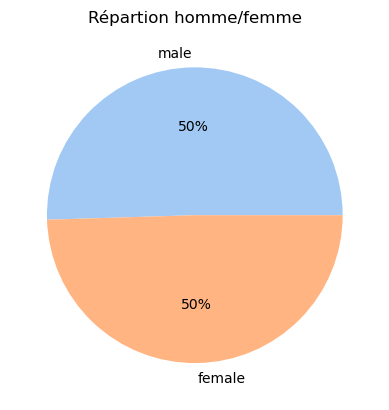

In [25]:
colors = sns.color_palette('pastel')
labels=['male','female']
plt.pie(df['sex'].value_counts(), colors = colors, labels=labels, autopct = '%0.0f%%')
plt.title('Répartion homme/femme')
plt.show()


In [26]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

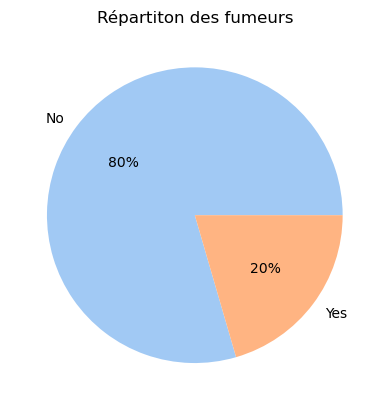

In [27]:
colors = sns.color_palette('pastel')
labels=['No','Yes']
plt.pie(df['smoker'].value_counts(), colors = colors, labels=labels, autopct = '%0.0f%%')
plt.title('Répartiton des fumeurs')
plt.show()


In [28]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

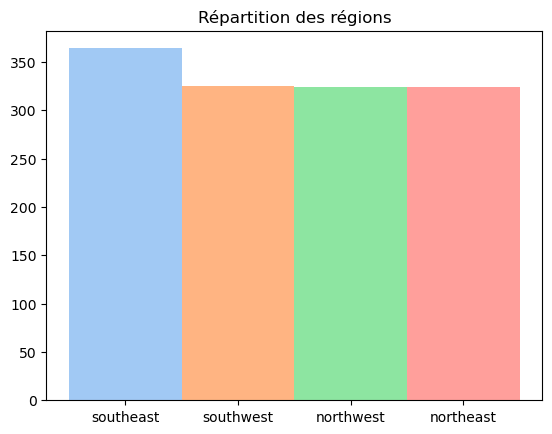

In [29]:
colors = sns.color_palette('pastel')
labels=["southeast","southwest","northwest","northeast"]
plt.bar(labels,df['region'].value_counts(), color = colors, width=1)
plt.title("Répartition des régions")
plt.show()

In [30]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

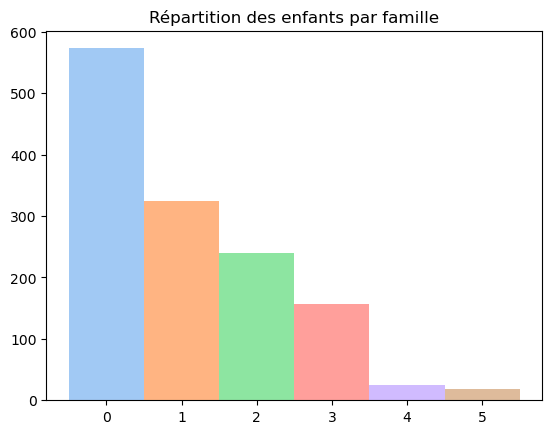

In [31]:
colors = sns.color_palette('pastel')
labels=[0,1,2,3,4,5]
plt.bar(labels,df['children'].value_counts(), color = colors, width=1)
plt.title("Répartition des enfants par famille")
plt.show()

#### Correlation des variables avec la variable cible (charges)

In [32]:
df[['age','charges']].corr()

,age,charges
age,1.000000,0.298308
charges,0.298308,1.000000


In [33]:
df[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198401
charges,0.198401,1.000000


In [34]:
stats.kstest(df['bmi'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [35]:
df['smoker'].replace({'yes':1,'no':0}, inplace=True)
df['sex'].replace({'male':1,'female':0}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges,cub_age,ln_charges
0,19,0,27.900,0,1,southwest,16884.92400,2.668402,9.734176
1,18,1,33.770,1,0,southeast,1725.55230,2.620741,7.453302
2,28,1,33.000,3,0,southeast,4449.46200,3.036589,8.400538
3,33,1,22.705,0,0,northwest,21984.47061,3.207534,9.998092
4,32,1,28.880,0,0,northwest,3866.85520,3.174802,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,3.684031,9.268661
1334,18,0,31.920,0,0,northeast,2205.98080,2.620741,7.698927
1335,18,0,36.850,0,0,southeast,1629.83350,2.620741,7.396233
1336,21,0,25.800,0,0,southwest,2007.94500,2.758924,7.604867


In [36]:
df[['sex','charges']].corr()

,sex,charges
sex,1.000000,0.058044
charges,0.058044,1.000000


In [37]:
corr, p_value = pointbiserialr(df['smoker'], df['charges'])
print("Le coefficient de corrélation point biserial est de :", corr)
print("Le p-value est de :", p_value)

Le coefficient de corrélation point biserial est de : 0.7872343672800317
Le p-value est de : 1.4067220949373763e-282
